# Network Models: Small World
Lab_4 Laptsuev Rodion.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import networkx as nx
%matplotlib inline
import random
import numpy.random as rnd


In [2]:
def gen_regular_graph(n, k):
    G = nx.Graph()
    nodes = list(range(n))
    for j in range(1, k // 2+1):
        targets = nodes[j:] + nodes[0:j] # first j nodes are now last in list
        G.add_edges_from(zip(nodes,targets))
    return G

def degree_distr(k, bins = 100):
    yh, binEdges = np.histogram(k, bins)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    return yh, bincenters

## 1.Implement rewind(G, p) function

In [3]:
def rewind(G,p):
    l=G.edges()
    count=0
    for i in reversed(range(len(l))):
        if rnd.random() <= p:
            G.remove_edge(int(l[i][0]),int(l[i][1]))
            del l[i]
            count=count+1
    G2=nx.complete_graph(nx.number_of_nodes(G))
    l2=G2.edges()
    for i in range(len(l)):
        l2.remove(l[i])
    rand_smpl = [ l2[i] for i in sorted(random.sample(range(len(l2)), count)) ]
    G.add_edges_from(rand_smpl)
    return G

## 2.Run experiments for various values of p, compute and show: average path length, clustering coefficients (transitivity),degree distribution.

In [5]:
average_path_length=list()
transitivity=list()
G_list=list()
for p in np.linspace(0.01,1,30):
    T=rewind(gen_regular_graph(1000, 10),p)
    average_path_length.append(nx.average_shortest_path_length(T))
    transitivity.append(nx.transitivity(T))
    G_list.append(T)

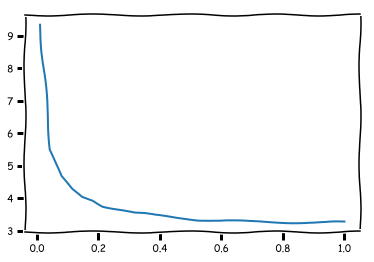

In [6]:
P=np.linspace(0.01,1,30)
plt.plot(P,average_path_length)

As we can see from the plot average path length decrease very fast with growth of P. It act like $Y=1/x$

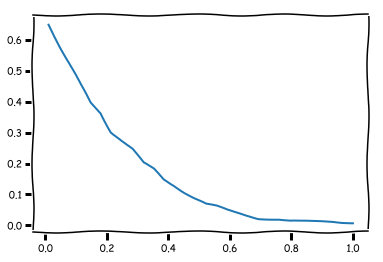

In [7]:
plt.plot(P,transitivity)

Transitivity also decrease but this derease is closer to linear than in apl case.

(array([   2.,    0.,    0.,    0.,    0.,    0.,   80.,    0.,    0.,
           0.,    0.,    0.,  837.,    0.,    0.,    0.,    0.,    0.,
          78.,    0.,    0.,    0.,    0.,    0.,    3.]),
 array([  8.  ,   8.16,   8.32,   8.48,   8.64,   8.8 ,   8.96,   9.12,
          9.28,   9.44,   9.6 ,   9.76,   9.92,  10.08,  10.24,  10.4 ,
         10.56,  10.72,  10.88,  11.04,  11.2 ,  11.36,  11.52,  11.68,
         11.84,  12.  ]),
 <a list of 25 Patch objects>)

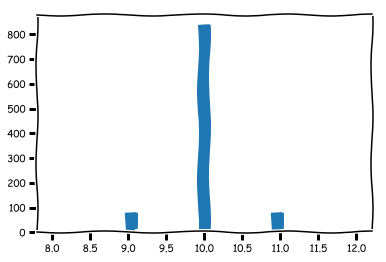

In [9]:
plt.hist(G_list[0].degree().values(),bins=25)

(array([   1.,    0.,    4.,    0.,   18.,    0.,   62.,    0.,  115.,
           0.,  202.,    0.,  205.,    0.,  186.,    0.,  116.,    0.,
          70.,    0.,   18.,    0.,    2.,    0.,    1.]),
 array([  4.  ,   4.48,   4.96,   5.44,   5.92,   6.4 ,   6.88,   7.36,
          7.84,   8.32,   8.8 ,   9.28,   9.76,  10.24,  10.72,  11.2 ,
         11.68,  12.16,  12.64,  13.12,  13.6 ,  14.08,  14.56,  15.04,
         15.52,  16.  ]),
 <a list of 25 Patch objects>)

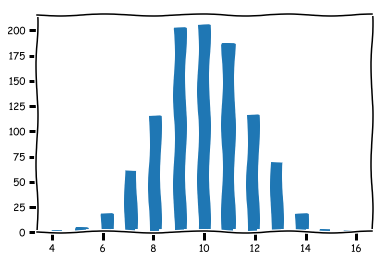

In [10]:
plt.hist(G_list[5].degree().values(),bins=25)

(array([   1.,    0.,    6.,    0.,   22.,   30.,    0.,   78.,  115.,
           0.,  164.,  206.,    0.,  138.,   98.,    0.,   66.,   38.,
           0.,   23.,    6.,    0.,    6.,    2.,    1.]),
 array([  2.  ,   2.68,   3.36,   4.04,   4.72,   5.4 ,   6.08,   6.76,
          7.44,   8.12,   8.8 ,   9.48,  10.16,  10.84,  11.52,  12.2 ,
         12.88,  13.56,  14.24,  14.92,  15.6 ,  16.28,  16.96,  17.64,
         18.32,  19.  ]),
 <a list of 25 Patch objects>)

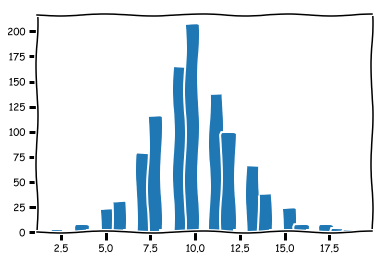

In [11]:
plt.hist(G_list[10].degree().values(),bins=25)

(array([   3.,   17.,   31.,    0.,   47.,   84.,  123.,    0.,  138.,
         150.,    0.,  130.,   90.,   73.,    0.,   53.,   32.,    0.,
          16.,    5.,    5.,    0.,    1.,    1.,    1.]),
 array([  3.  ,   3.72,   4.44,   5.16,   5.88,   6.6 ,   7.32,   8.04,
          8.76,   9.48,  10.2 ,  10.92,  11.64,  12.36,  13.08,  13.8 ,
         14.52,  15.24,  15.96,  16.68,  17.4 ,  18.12,  18.84,  19.56,
         20.28,  21.  ]),
 <a list of 25 Patch objects>)

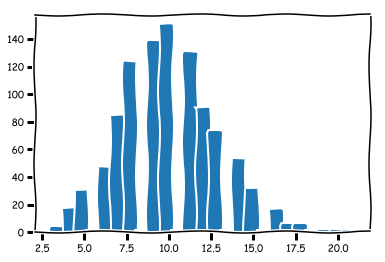

In [12]:
plt.hist(G_list[15].degree().values(),bins=25)

(array([   4.,    9.,   20.,   33.,   59.,  100.,  117.,  118.,  112.,
         117.,  103.,   78.,   51.,   27.,   25.,   12.,    7.,    4.,
           3.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  2.  ,   2.96,   3.92,   4.88,   5.84,   6.8 ,   7.76,   8.72,
          9.68,  10.64,  11.6 ,  12.56,  13.52,  14.48,  15.44,  16.4 ,
         17.36,  18.32,  19.28,  20.24,  21.2 ,  22.16,  23.12,  24.08,
         25.04,  26.  ]),
 <a list of 25 Patch objects>)

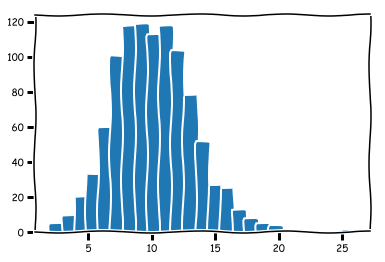

In [13]:
plt.hist(G_list[20].degree().values(),bins=25)

(array([   1.,    1.,    5.,   15.,    0.,   35.,   72.,   89.,  112.,
           0.,  139.,  110.,  116.,  102.,    0.,   70.,   55.,   32.,
          18.,    0.,   15.,    9.,    1.,    2.,    1.]),
 array([  1. ,   1.8,   2.6,   3.4,   4.2,   5. ,   5.8,   6.6,   7.4,
          8.2,   9. ,   9.8,  10.6,  11.4,  12.2,  13. ,  13.8,  14.6,
         15.4,  16.2,  17. ,  17.8,  18.6,  19.4,  20.2,  21. ]),
 <a list of 25 Patch objects>)

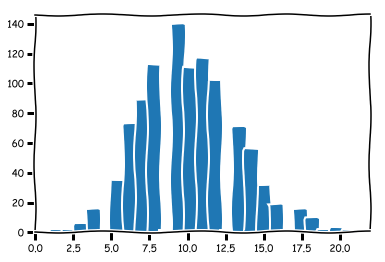

In [14]:
plt.hist(G_list[25].degree().values(),bins=25)

(array([   1.,    6.,   26.,   28.,    0.,   69.,   87.,  117.,  119.,
           0.,  127.,  113.,   93.,   83.,    0.,   52.,   34.,   20.,
          18.,    0.,    3.,    2.,    1.,    0.,    1.]),
 array([  2. ,   2.8,   3.6,   4.4,   5.2,   6. ,   6.8,   7.6,   8.4,
          9.2,  10. ,  10.8,  11.6,  12.4,  13.2,  14. ,  14.8,  15.6,
         16.4,  17.2,  18. ,  18.8,  19.6,  20.4,  21.2,  22. ]),
 <a list of 25 Patch objects>)

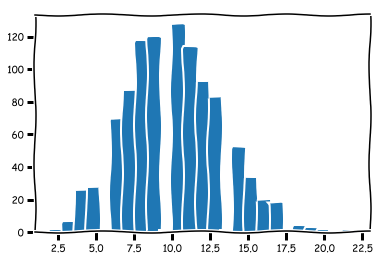

In [15]:
plt.hist(G_list[29].degree().values(),bins=25)

As for degree distribution we can only say that the varience increase(obvious result) and appereance of nodes with high degree that make graph less symmetric. 

## 3. Compute centrality metrics for the network (including eigenvector, Katz, dispersion, local load centralities) and highlight interaction between vertices with the highest degree. Plot the interesting cases and interpret them.

In [21]:
G=nx.read_gml("polblogs2.gml")

In [39]:
z=G.edges()
for i in reversed(range(len(Z))):
    if z[i][0]==z[i][1]:
        del z[i]

In [76]:
polblogs=nx.DiGraph()
polblogs.add_edges_from(set(z))
pos = nx.spring_layout(polblogs) 

### eigen_vector centrality + top 5 nodes with highes coeffs 

[(u'talkleft.com', 0.16160909374620266),
 (u'washingtonmonthly.com', 0.1877665648223934),
 (u'talkingpointsmemo.com', 0.21033635070326936),
 (u'dailykos.com', 0.21639017195098736),
 (u'atrios.blogspot.com', 0.23425505375199346)]

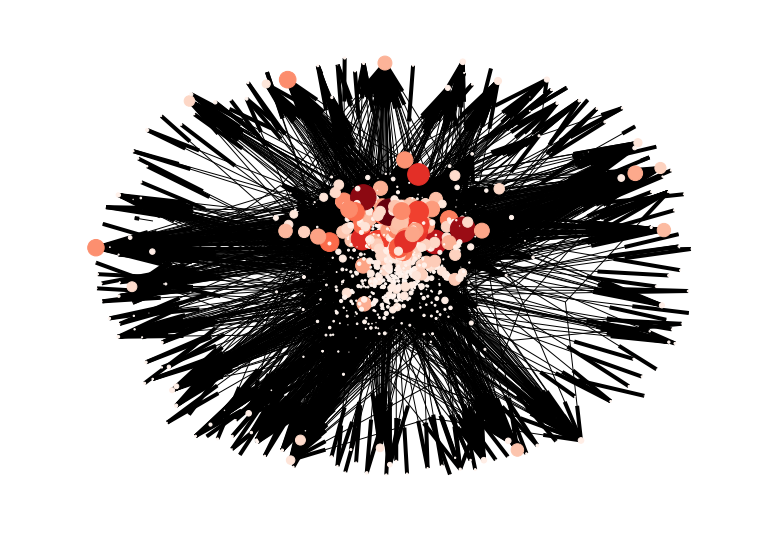

In [66]:
# eigen_vector centrality
cl = nx.eigenvector_centrality(polblogs)
plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(polblogs)
nx.draw(polblogs,
          pos,
          nodelist=cl.keys(),
          node_size = [d*3000 for d in cl.values()],
          node_color=cl.values(),
          font_size=8,
          cmap=plt.cm.Reds,
          )
sorted(cl.items(), key=lambda x:x[1])[len(cl)-5:len(cl)]

### Katz centrality + top 5 nodes with highes coeffs 

C:\Users\rpl\Anaconda2\lib\site-packages\matplotlib\collections.py:865: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


[(u'atrios.blogspot.com', 0.1394132641093098),
 (u'politicalwire.com', 0.14990360578071024),
 (u'washingtonmonthly.com', 0.16378351470057279),
 (u'dailykos.com', 0.1762370645187724),
 (u'talkingpointsmemo.com', 0.2562994633577823)]

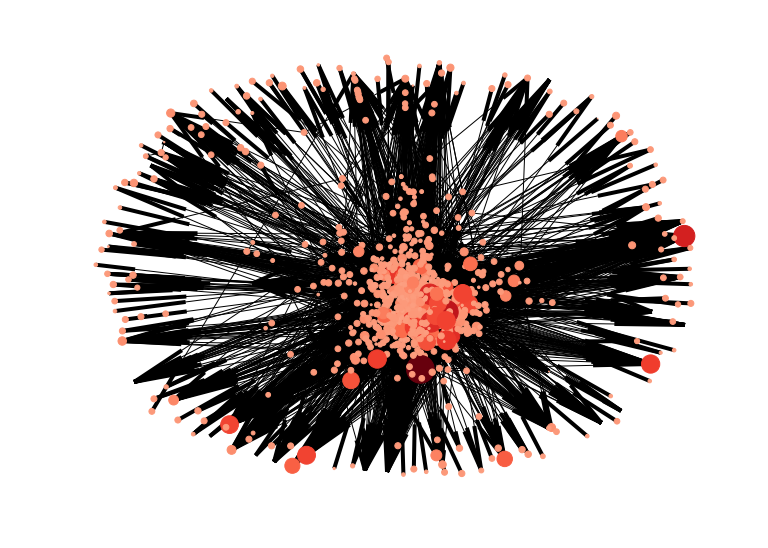

In [85]:
# Katz centrality
cl = nx.katz_centrality_numpy(polblogs)
plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(polblogs)
nx.draw(polblogs,
          pos,
          nodelist=cl.keys(),
          node_size = [d*3000 for d in cl.values()],
          node_color=cl.values(),
          font_size=8,
          cmap=plt.cm.Reds,
          )
sorted(cl.items(), key=lambda x:x[1])[len(cl)-5:len(cl)]

### load centrality + top 5 nodes with highes coeffs 

[(u'newleftblogs.blogspot.com', 0.03024925199278705),
 (u'dailykos.com', 0.03465072300437861),
 (u'instapundit.com', 0.048024885753695054),
 (u'atrios.blogspot.com', 0.05433510056454776),
 (u'blogsforbush.com', 0.1398220725173439)]

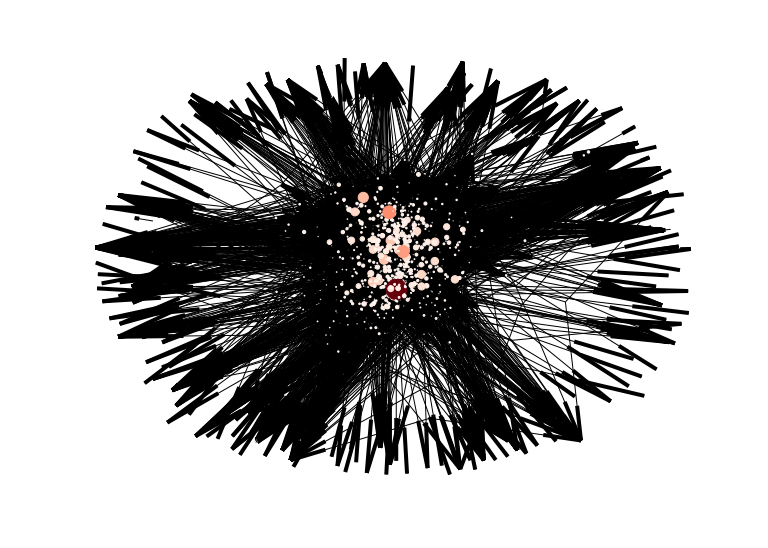

In [69]:
# load centrality
cl = nx.load_centrality(polblogs)
plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(polblogs)
nx.draw(polblogs,
          pos,
          nodelist=cl.keys(),
          node_size = [d*3000 for d in cl.values()],
          node_color=cl.values(),
          font_size=8,
          cmap=plt.cm.Reds,
          )
sorted(cl.items(), key=lambda x:x[1])[len(cl)-5:len(cl)]

In [78]:
# dispersion
nx.dispersion(polblogs)

{u'tsrightdominion.blogspot.com': {u'aldaynet.org': 2.0,
  u'anncoulter.org': 0.0,
  u'blogsagainsthillary.com': 0.0,
  u'blogsforbush.com': 0.3333333333333333,
  u'conservativepunk.com': 0.0,
  u'coxandforkum.com': 0.6666666666666666,
  u'dailykos.com': 0.0,
  u'democraticunderground.com': 0.0,
  u'drudgereport.com': 0.0,
  u'freerepublic.com': 0.0,
  u'gevkaffeegal.typepad.com/the_alliance': 0.0,
  u'hughhewitt.com': 1.4,
  u'michellemalkin.com': 0.6666666666666666,
  u'rightwingnews.com': 0.5,
  u'scrappleface.com': 0.0,
  u'wonkette.com': 0.6666666666666666},
 u'rightrainbow.com': {u'blogsforbush.com': 0.75,
  u'captainsquartersblog.com/mt': 0.5,
  u'coxandforkum.com': 0.0,
  u'gopbloggers.org': 0.0,
  u'patrickruffini.com': 0.0,
  u'polipundit.com': 0.0},
 u'truebluegal.blogspot.com': {u'babytrollblog.com': 1.0,
  u'bluegoldfish.blogs.com/surface': 0.0,
  u'dailyrecycler.com/blog': 0.0,
  u'deanesmay.com': 0.0,
  u'dgci.net': 0.0,
  u'dissectleft.blogspot.com': 1.2,
  u'lashawnbar

## dailykos.com,atrios.blogspot.com was among top nodes in all metrics and they also was in the top 5 verticles with highest degree centralities. 

[(u'atrios.blogspot.com', 0.1394132641093098),
 (u'politicalwire.com', 0.14990360578071024),
 (u'washingtonmonthly.com', 0.16378351470057279),
 (u'dailykos.com', 0.1762370645187724),
 (u'talkingpointsmemo.com', 0.2562994633577823)]

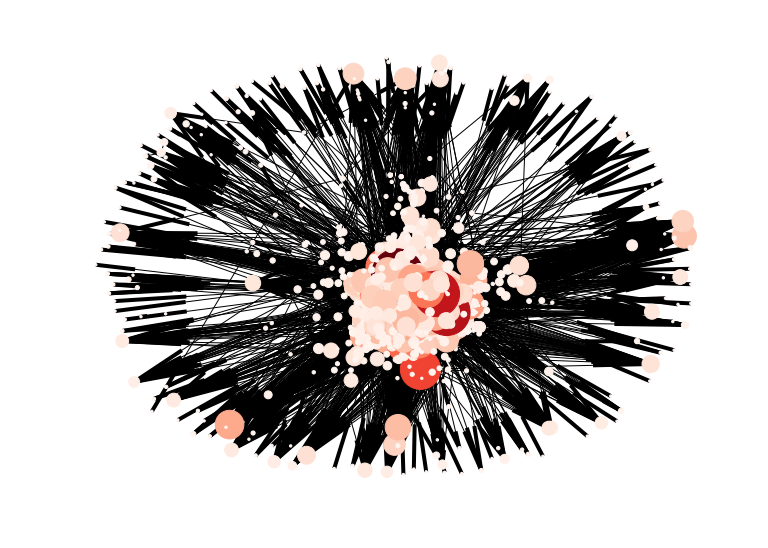

In [87]:
# Degree centrality
dc = nx.degree_centrality(polblogs)
plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(polblogs)
nx.draw(polblogs,
          pos,
          nodelist=dc.keys(),
          node_size = [d*7000 for d in dc.values()],
          node_color=dc.values(),
          font_size=8,
          cmap=plt.cm.Reds,
          )
sorted(cl.items(), key=lambda x:x[1])[len(cl)-5:len(cl)]

## 4.Try to model the network from (3) with Small World Model and Erdos-Renyi Model.

In [88]:
polblogs=nx.Graph()
polblogs.add_edges_from(set(z))

In [89]:
p=2*float(nx.number_of_edges(polblogs))/float(nx.number_of_nodes(polblogs)*(nx.number_of_nodes(polblogs)-1))
p

0.022332045382884688

In [113]:
erdos_model_graph=nx.erdos_renyi_graph(nx.number_of_nodes(polblogs),p)

In [97]:
graphs = list(nx.connected_component_subgraphs(polblogs))

In [108]:
small_world_model_graph=rewind(gen_regular_graph(nx.number_of_nodes(polblogs), int(np.mean(graphs[0].degree().values()))),0.5)

In [109]:
nx.average_shortest_path_length(graphs[0])

2.7375296736998864

In [110]:
nx.average_shortest_path_length(small_world_model_graph)

2.6051002303347066

## 5.Plot the dependencies between different centrality metrics for the network and the simultaed graphs. Are there any correlations between centrality metrics? Explain the differences.

In [114]:
eg_cent_real = nx.eigenvector_centrality(polblogs)
eg_cent_model_ER = nx.eigenvector_centrality(erdos_model_graph)
eg_cent_model_SW = nx.eigenvector_centrality(small_world_model_graph)

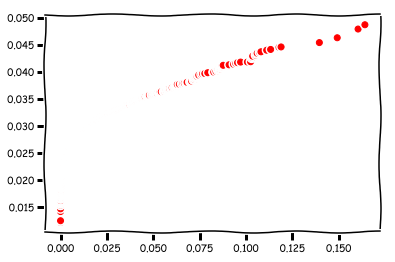

In [117]:
plt.plot(sorted(eg_cent_real.values()),sorted(eg_cent_model_ER.values()),"ro")

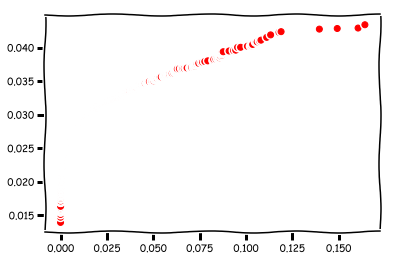

In [118]:
plt.plot(sorted(eg_cent_real.values()),sorted(eg_cent_model_SW.values()),"ro")

For both cases there is some correlation but for most of the verticles the metric was greater on a real graph.

In [119]:
ka_cent_real = nx.katz_centrality_numpy(polblogs)
ka_cent_model_ER = nx.katz_centrality_numpy(erdos_model_graph)
ka_cent_model_SW = nx.katz_centrality_numpy(small_world_model_graph)

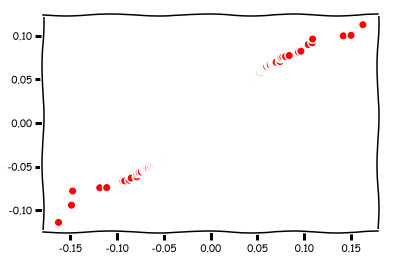

In [120]:
plt.plot(sorted(ka_cent_real.values()),sorted(ka_cent_model_ER.values()),"ro")

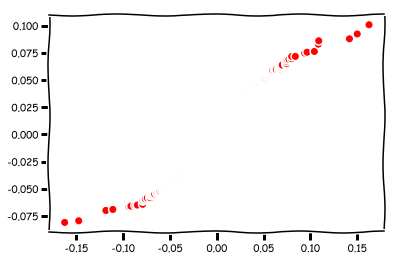

In [121]:
plt.plot(sorted(ka_cent_real.values()),sorted(ka_cent_model_SW.values()),"ro")

For both cases there is some correlation but for most of the verticles the metric was greater on a real graph.

In [122]:
ld_cent_real = nx.load_centrality(polblogs)
ld_cent_model_ER = nx.load_centrality(erdos_model_graph)
ld_cent_model_SW = nx.load_centrality(small_world_model_graph)

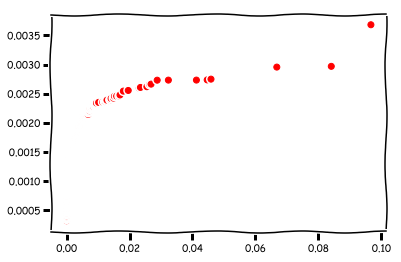

In [123]:
plt.plot(sorted(ld_cent_real.values()),sorted(ld_cent_model_ER.values()),"ro")

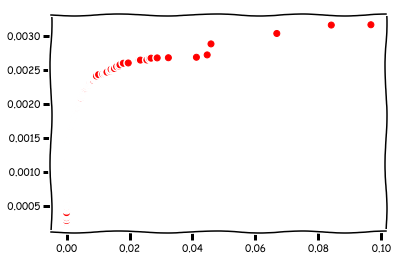

In [124]:
plt.plot(sorted(ld_cent_real.values()),sorted(ld_cent_model_SW.values()),"ro")

less linear dependency in comparison with previous cases.